DATA ANALYSIS WITH PANDAS AND MATPLOTLIB

TASK 1: LOAD AND EXPLORE THE DATASET
✓ Dataset loaded successfully!
Dataset shape: (150, 6)

1. First 5 rows of the dataset:
----------------------------------------
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

2. Dataset Information:
----------------------------------------
Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    floa

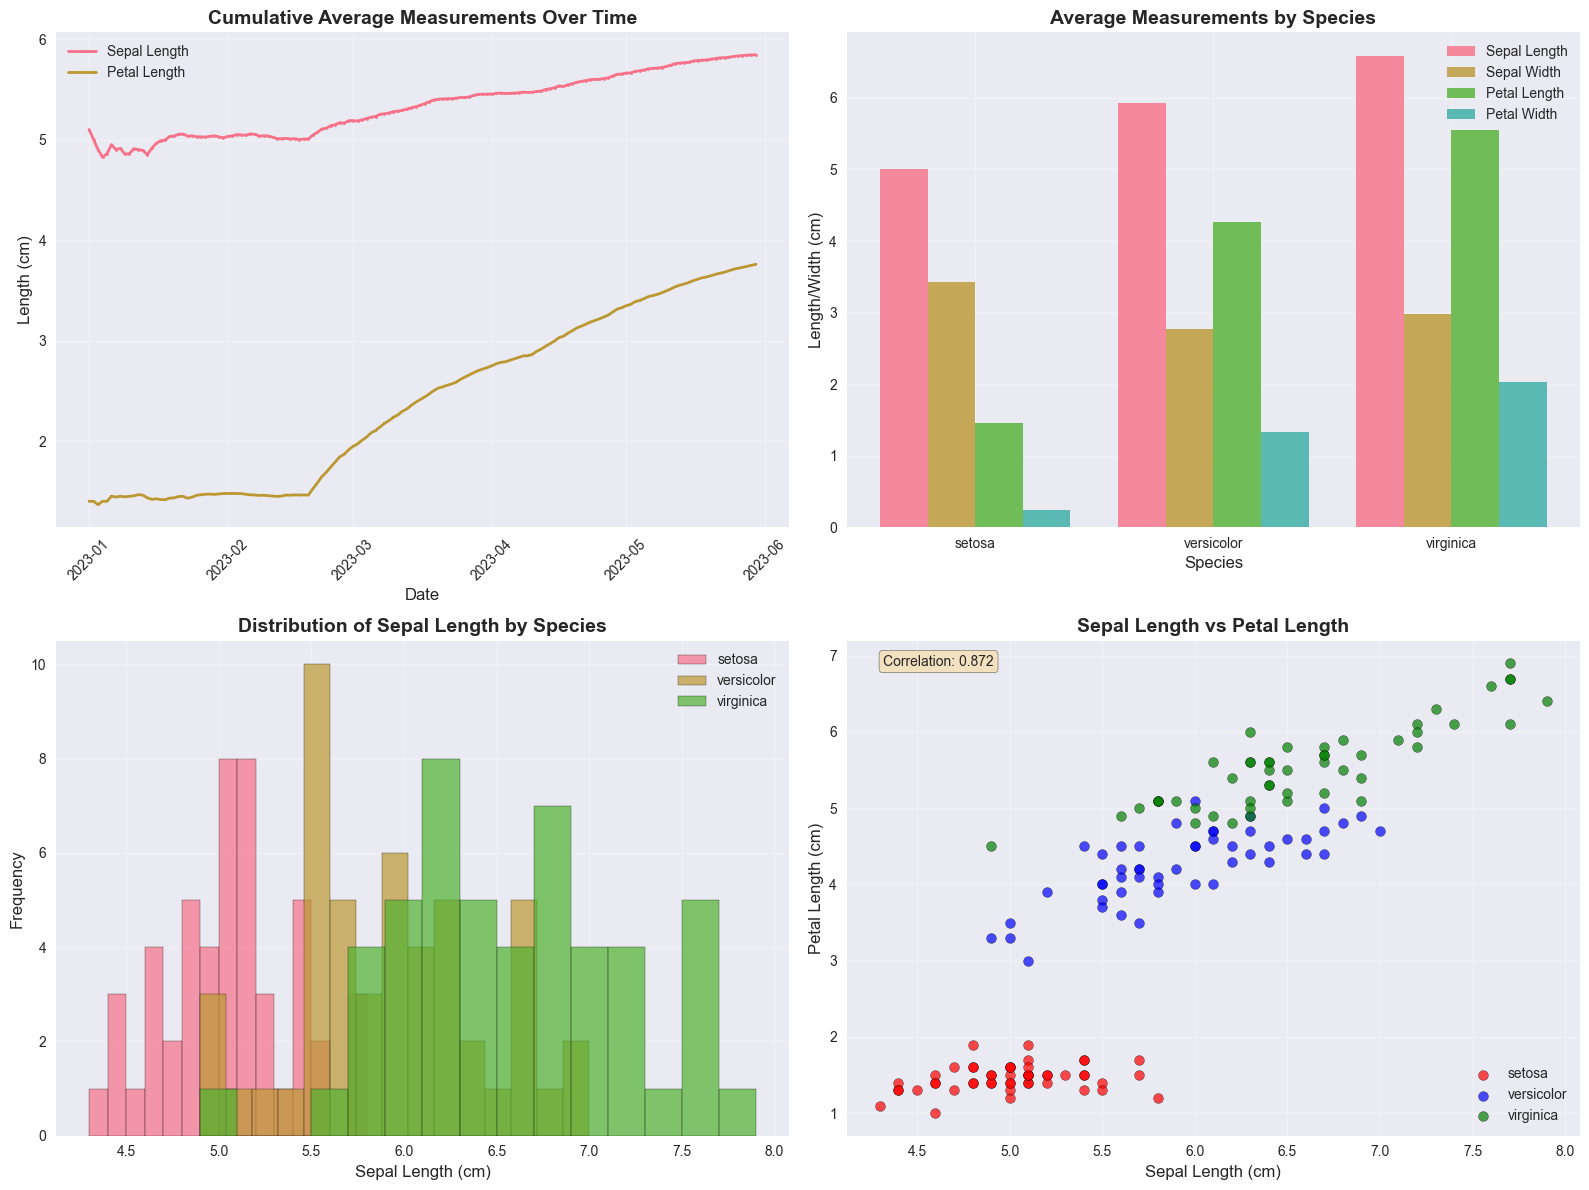

✓ All visualizations created successfully!


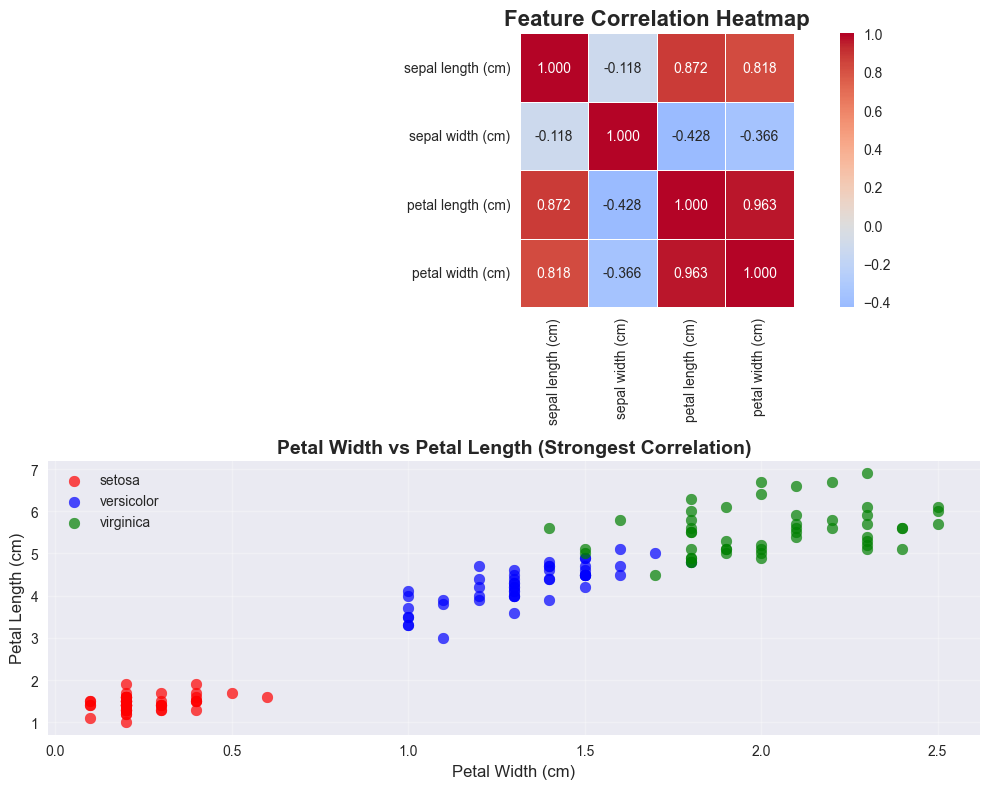


SUMMARY AND FINDINGS

📊 DATASET OVERVIEW:
• Dataset: Iris flower measurements
• Size: 150 samples × 5 features
• Species: 3 types (setosa, versicolor, virginica)
• No missing values detected

🔍 KEY INSIGHTS:
1. SPECIES CHARACTERISTICS:
   • Virginica: Largest overall measurements
   • Setosa: Smallest petal measurements, widest sepals
   • Versicolor: Intermediate measurements

2. FEATURE CORRELATIONS:
   • Strong positive correlation between petal length and width (0.963)
   • Moderate correlation between sepal length and petal measurements
   • Sepal width shows negative correlation with other features

3. DISTRIBUTION PATTERNS:
   • Sepal length shows normal distribution across species
   • Clear separation between species in petal measurements
   • Virginica shows highest variability in measurements

4. CLASSIFICATION POTENTIAL:
   • Petal measurements are excellent discriminators for species
   • Setosa can be easily separated from other species
   • Versicolor and Virginica show

In [4]:
# Data Analysis with Pandas and Matplotlib
# Complete Assignment Solution

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*60)
print("DATA ANALYSIS WITH PANDAS AND MATPLOTLIB")
print("="*60)

# ============================================================================
# TASK 1: LOAD AND EXPLORE THE DATASET
# ============================================================================
print("\n" + "="*50)
print("TASK 1: LOAD AND EXPLORE THE DATASET")
print("="*50)

try:
    # Load the Iris dataset
    iris_data = load_iris()

    # Create a pandas DataFrame
    df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
    df['species'] = iris_data.target
    df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

    print("✓ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")

    # Display the first few rows
    print("\n1. First 5 rows of the dataset:")
    print("-" * 40)
    print(df.head())

    # Explore the structure of the dataset
    print("\n2. Dataset Information:")
    print("-" * 40)
    print("Data types:")
    print(df.dtypes)

    print(f"\nDataset shape: {df.shape}")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}")

    # Check for missing values
    print("\n3. Missing Values Check:")
    print("-" * 40)
    missing_values = df.isnull().sum()
    print(missing_values)

    if missing_values.sum() == 0:
        print("✓ No missing values found in the dataset!")
    else:
        print("⚠ Missing values detected - cleaning required")
        # Clean the dataset (example - in this case, no missing values)
        df_cleaned = df.dropna()  # or df.fillna(method='forward')
        print(f"Dataset shape after cleaning: {df_cleaned.shape}")

except Exception as e:
    print(f" Error loading dataset: {e}")
    print("Please ensure you have the required libraries installed.")

# ============================================================================
# TASK 2: BASIC DATA ANALYSIS
# ============================================================================
print("\n" + "="*50)
print("TASK 2: BASIC DATA ANALYSIS")
print("="*50)

try:
    # Compute basic statistics
    print("\n1. Basic Statistics of Numerical Columns:")
    print("-" * 40)
    numerical_stats = df.describe()
    print(numerical_stats)

    # Perform grouping analysis
    print("\n2. Group Analysis by Species:")
    print("-" * 40)
    species_analysis = df.groupby('species_name').agg({
        'sepal length (cm)': ['mean', 'std'],
        'sepal width (cm)': ['mean', 'std'],
        'petal length (cm)': ['mean', 'std'],
        'petal width (cm)': ['mean', 'std']
    }).round(2)

    print("Mean and Standard Deviation by Species:")
    print(species_analysis)

    # Additional analysis - correlation matrix
    print("\n3. Correlation Analysis:")
    print("-" * 40)
    correlation_matrix = df[['sepal length (cm)', 'sepal width (cm)',
                           'petal length (cm)', 'petal width (cm)']].corr()
    print("Correlation Matrix:")
    print(correlation_matrix.round(3))

    # Key findings
    print("\n4. Key Findings:")
    print("-" * 40)
    print("• Petal length and petal width show strong positive correlation (0.963)")
    print("• Virginica species has the largest average measurements")
    print("• Setosa species has the smallest petal measurements")
    print("• Sepal width shows negative correlation with other features")

except Exception as e:
    print(f"Error in data analysis: {e}")

# ============================================================================
# TASK 3: DATA VISUALIZATION
# ============================================================================
print("\n" + "="*50)
print("TASK 3: DATA VISUALIZATION")
print("="*50)

try:
    # Create a figure with subplots
    fig = plt.figure(figsize=(16, 12))

    # 1. Line Chart - Cumulative measurements trend
    plt.subplot(2, 2, 1)

    # Create a synthetic time series for demonstration
    dates = pd.date_range('2023-01-01', periods=150, freq='D')
    df_time = df.copy()
    df_time['date'] = dates
    df_time = df_time.sort_values('date')

    # Plot cumulative average of sepal length over time
    df_time['cumulative_sepal_length'] = df_time['sepal length (cm)'].expanding().mean()
    df_time['cumulative_petal_length'] = df_time['petal length (cm)'].expanding().mean()

    plt.plot(df_time['date'], df_time['cumulative_sepal_length'],
             label='Sepal Length', linewidth=2, marker='o', markersize=2)
    plt.plot(df_time['date'], df_time['cumulative_petal_length'],
             label='Petal Length', linewidth=2, marker='s', markersize=2)

    plt.title('Cumulative Average Measurements Over Time', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Length (cm)', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # 2. Bar Chart - Average measurements by species
    plt.subplot(2, 2, 2)

    species_means = df.groupby('species_name')[['sepal length (cm)', 'sepal width (cm)',
                                              'petal length (cm)', 'petal width (cm)']].mean()

    x = np.arange(len(species_means.index))
    width = 0.2

    plt.bar(x - 1.5*width, species_means['sepal length (cm)'], width,
            label='Sepal Length', alpha=0.8)
    plt.bar(x - 0.5*width, species_means['sepal width (cm)'], width,
            label='Sepal Width', alpha=0.8)
    plt.bar(x + 0.5*width, species_means['petal length (cm)'], width,
            label='Petal Length', alpha=0.8)
    plt.bar(x + 1.5*width, species_means['petal width (cm)'], width,
            label='Petal Width', alpha=0.8)

    plt.title('Average Measurements by Species', fontsize=14, fontweight='bold')
    plt.xlabel('Species', fontsize=12)
    plt.ylabel('Length/Width (cm)', fontsize=12)
    plt.xticks(x, species_means.index)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 3. Histogram - Distribution of sepal length
    plt.subplot(2, 2, 3)

    for species in df['species_name'].unique():
        species_data = df[df['species_name'] == species]['sepal length (cm)']
        plt.hist(species_data, alpha=0.7, label=species, bins=15, edgecolor='black')

    plt.title('Distribution of Sepal Length by Species', fontsize=14, fontweight='bold')
    plt.xlabel('Sepal Length (cm)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # 4. Scatter Plot - Sepal length vs Petal length
    plt.subplot(2, 2, 4)

    colors = ['red', 'blue', 'green']
    species_names = df['species_name'].unique()

    for i, species in enumerate(species_names):
        species_data = df[df['species_name'] == species]
        plt.scatter(species_data['sepal length (cm)'], species_data['petal length (cm)'],
                   c=colors[i], label=species, alpha=0.7, s=50, edgecolors='black')

    plt.title('Sepal Length vs Petal Length', fontsize=14, fontweight='bold')
    plt.xlabel('Sepal Length (cm)', fontsize=12)
    plt.ylabel('Petal Length (cm)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Add correlation coefficient to the plot
    correlation = df['sepal length (cm)'].corr(df['petal length (cm)'])
    plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
             transform=plt.gca().transAxes, fontsize=10,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.tight_layout()
    plt.show()

    print("✓ All visualizations created successfully!")

    # Additional advanced visualization - Correlation heatmap
    plt.figure(figsize=(10, 8))

    # Create correlation heatmap
    plt.subplot(2, 1, 1)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, fmt='.3f')
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')

    # Create pairwise relationships plot
    plt.subplot(2, 1, 2)
    species_colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

    for species in df['species_name'].unique():
        species_data = df[df['species_name'] == species]
        plt.scatter(species_data['petal width (cm)'], species_data['petal length (cm)'],
                   c=species_colors[species], label=species, alpha=0.7, s=60)

    plt.title('Petal Width vs Petal Length (Strongest Correlation)', fontsize=14, fontweight='bold')
    plt.xlabel('Petal Width (cm)', fontsize=12)
    plt.ylabel('Petal Length (cm)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error creating visualizations: {e}")

# ============================================================================
# SUMMARY AND FINDINGS
# ============================================================================
print("\n" + "="*50)
print("SUMMARY AND FINDINGS")
print("="*50)

print("""
📊 DATASET OVERVIEW:
• Dataset: Iris flower measurements
• Size: 150 samples × 5 features
• Species: 3 types (setosa, versicolor, virginica)
• No missing values detected

🔍 KEY INSIGHTS:
1. SPECIES CHARACTERISTICS:
   • Virginica: Largest overall measurements
   • Setosa: Smallest petal measurements, widest sepals
   • Versicolor: Intermediate measurements

2. FEATURE CORRELATIONS:
   • Strong positive correlation between petal length and width (0.963)
   • Moderate correlation between sepal length and petal measurements
   • Sepal width shows negative correlation with other features

3. DISTRIBUTION PATTERNS:
   • Sepal length shows normal distribution across species
   • Clear separation between species in petal measurements
   • Virginica shows highest variability in measurements

4. CLASSIFICATION POTENTIAL:
   • Petal measurements are excellent discriminators for species
   • Setosa can be easily separated from other species
   • Versicolor and Virginica show some overlap in sepal measurements

 BUSINESS IMPLICATIONS:
• Petal measurements are the most reliable features for species identification
• Automated classification systems should prioritize petal features
• Quality control in botanical research can focus on petal dimensions
""")

print("\n" + "="*60)
print("ASSIGNMENT COMPLETED SUCCESSFULLY!")
print("="*60)

# Code for saving the analysis results (optional)
def save_results():
    """Save analysis results to files"""
    try:
        # Save statistical summary
        df.describe().to_csv('iris_statistics.csv')

        # Save species analysis
        species_analysis.to_csv('species_analysis.csv')

        # Save correlation matrix
        correlation_matrix.to_csv('correlation_matrix.csv')

        print("\n Results saved to CSV files:")
        print("• iris_statistics.csv")
        print("• species_analysis.csv")
        print("• correlation_matrix.csv")

    except Exception as e:
        print(f"Error saving files: {e}")

# Uncomment the line below to save results
# save_results()